In [23]:
import numpy as np

import sys
sys.path.insert(0, '../src')
from utils import *

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

In [24]:
mpl.rcParams["figure.facecolor"] = "white" # set to white the background behind axes and labels

In [28]:
AWS_FOLDER_COMPUTE = "./saved_results/aws_computed/"
SAVE_FOLDER = "./saved_results/comparison/"
import os
os.makedirs(SAVE_FOLDER, exist_ok=True)

In [3]:
# Import all the variables from the dump files

fred30_60_max_len_list = load_variables("fred_max_len_list.dump", AWS_FOLDER_COMPUTE)
int_max_len_list = load_variables("int_max_len_list.dump", AWS_FOLDER_COMPUTE)

fred30_60_time_list = load_variables("fred_time_list.dump", AWS_FOLDER_COMPUTE)
int_time_list = load_variables("int_time_list.dump", AWS_FOLDER_COMPUTE)
agnostic_int_time_list = load_variables("agnostic_int_time_list.dump", AWS_FOLDER_COMPUTE)

fred30_60_smN = load_variables("fred_smN.dump", AWS_FOLDER_COMPUTE)
int_smN = load_variables("int_smN.dump", AWS_FOLDER_COMPUTE)

# Notice: the following variables have a different structure w.r.t. the previous ones.
# Below we compare smN and ahp30_smN
ahp30_max_len_list = load_variables("ahp_max_len_list.dump", AWS_FOLDER_COMPUTE)
ahp30_mat_time_list = load_variables("ahp_mat_time_list.dump", AWS_FOLDER_COMPUTE)
ahp30_time_list = load_variables("ahp_time_list.dump", AWS_FOLDER_COMPUTE)
ahp30_smN = load_variables("ahp_smN.dump", AWS_FOLDER_COMPUTE)

In [4]:
print(len(int_smN))
print(len(fred30_60_smN))
print(len(ahp30_smN))

27
18
6


### Add trailing values to Fred and AHP data
In the Frederickson data, we don't have all the cases with N=120. We have 9 missing values.

For AHP, only values for N=30 and m=5,10 are available, but the data structure should have the same length as for Fred and Int.
There are 21 missing values.

In [5]:
fred_max_len_list = fred30_60_max_len_list + [0]*9
fred_time_list = fred30_60_time_list + [np.nan]*9
fred_smN = fred30_60_smN + [()]*9

ahp_max_len_list = ahp30_max_len_list + [0]*21
ahp_mat_time_list = ahp30_mat_time_list + [0]*21
ahp_time_list = ahp30_time_list + [np.nan]*21
ahp_smN = ahp30_smN + [()]*21

smN = int_smN

In [6]:
print(len(int_smN))
print(len(fred_smN))
print(len(ahp_smN))

27
27
27


### Pattern analysis
Compute the percentuale difference between all the triples of makespans (for the three patterns) for each algorithm

In [7]:
def difference(max_len_list):
    for i in range(len(max_len_list)//3):
        v1, v2, v3 = max_len_list[3*i:3*i+3]
        m = min(v1,v2,v3)
        M = max(v1,v2,v3)
        if M == 0:
            print("nan")
            continue
        diff = (M-m)/M
        print(str(int(round(diff, 2)*100))+"%")

In [8]:
print("Fred algorithm")
difference(fred_max_len_list)

print("\nInt algorithm")
difference(int_max_len_list)

print("\nAHP algorithm")
difference(ahp_max_len_list)

Fred algorithm
1%
7%
3%
5%
11%
5%
nan
nan
nan

Int algorithm
3%
10%
14%
6%
7%
10%
5%
9%
8%

AHP algorithm
2%
1%
nan
nan
nan
nan
nan
nan
nan


In [9]:
def difference_from_random(max_len_list):
    for i in range(len(max_len_list)//3):
        v1, v2, v3 = max_len_list[3*i:3*i+3]
        diff1 = abs(v1-v2)
        diff2 = abs(v1-v3)
        max_diff = max(diff1, diff2)
        if v1 == 0:
            print("nan")
            continue
        print(str(int(round(max_diff/v1, 2)*100))+"%")

In [10]:
print("Fred algorithm")
difference_from_random(fred_max_len_list)

print("\nInt algorithm")
difference_from_random(int_max_len_list)

print("\nAHP algorithm")
difference_from_random(ahp_max_len_list)

Fred algorithm
1%
7%
3%
5%
10%
5%
nan
nan
nan

Int algorithm
3%
10%
14%
4%
4%
6%
3%
6%
7%

AHP algorithm
2%
1%
nan
nan
nan
nan
nan
nan
nan


# Plots

In [11]:
# Useful function for plotting

def compute_labels(smn):
    labels = []
    for s,m,n in smn:
        labels.append("{} rob, {} mod".format(m,n))
    
    return labels


def extr_random(array):
    return array[0::3]


def extr_decreasing(array):
    return array[1::3]


def extr_increasing(array):
    return array[2::3]

In [46]:
# PLOT CONFIGURATION PARAMETERS
YLIM=12000
PLT_W = 7
PLT_H = 5

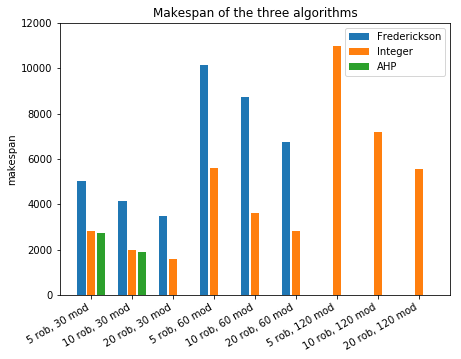

In [52]:
# Grouped bar plot
############# RANDOM #############

width = 0.5 # width of each bar
bar_dist = 0.1 # distance between bars of the same groups
group_dist = 0.8 # distance between bars of different groups
x_dist = width*3 + bar_dist*2 + group_dist

xs = np.arange(0, len(extr_random(smN))) * x_dist # scale the x coordinates to make space to the bars

int_xs = xs
fred_xs = xs - width - bar_dist
ahp_xs = int_xs + width + bar_dist

fig, ax = plt.subplots() # needed to rotate the labels

fred_bars = plt.bar(fred_xs, extr_random(fred_max_len_list), width)
int_bars= plt.bar(int_xs, extr_random(int_max_len_list), width)
ahp_bars = plt.bar(ahp_xs, extr_random(ahp_max_len_list), width)

plt.ylabel("makespan")
plt.title("Makespan of the three algorithms - Pattern Random")
plt.xticks(xs, extr_random(compute_labels(smN)))
ax.set_ylim(top=YLIM)

plt.legend((fred_bars, int_bars, ahp_bars), ("Frederickson", "Integer", "AHP"))
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

fig.set_size_inches(PLT_W, PLT_H)
fig.savefig(SAVE_FOLDER+"random_makespan.pdf", bbox_inches='tight', pad_inches=0.1)

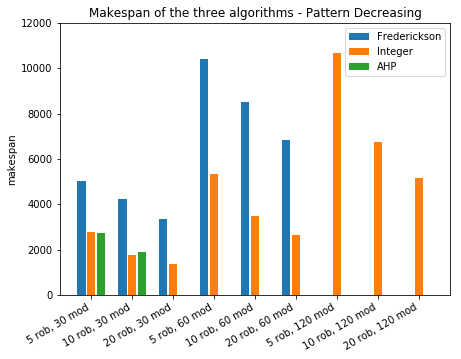

In [48]:
# Grouped bar plot
############# DECREASING #############

width = 0.5 # width of each bar
bar_dist = 0.1 # distance between bars of the same groups
group_dist = 0.8 # distance between bars of different groups
x_dist = width*3 + bar_dist*2 + group_dist

xs = np.arange(0, len(extr_decreasing(smN))) * x_dist # scale the x coordinates to make space to the bars

int_xs = xs
fred_xs = xs - width - bar_dist
ahp_xs = int_xs + width + bar_dist

fig, ax = plt.subplots() # needed to rotate the labels

fred_bars = plt.bar(fred_xs, extr_decreasing(fred_max_len_list), width)
int_bars= plt.bar(int_xs, extr_decreasing(int_max_len_list), width)
ahp_bars = plt.bar(ahp_xs, extr_decreasing(ahp_max_len_list), width)

plt.ylabel("makespan")
plt.title("Makespan of the three algorithms - Pattern Decreasing")
plt.xticks(xs, extr_decreasing(compute_labels(smN)))
ax.set_ylim(top=YLIM)

plt.legend((fred_bars, int_bars, ahp_bars), ("Frederickson", "Integer", "AHP"))
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

fig.set_size_inches(PLT_W, PLT_H)
fig.savefig(SAVE_FOLDER+"decreasing_makespan.pdf", bbox_inches='tight', pad_inches=0.1)

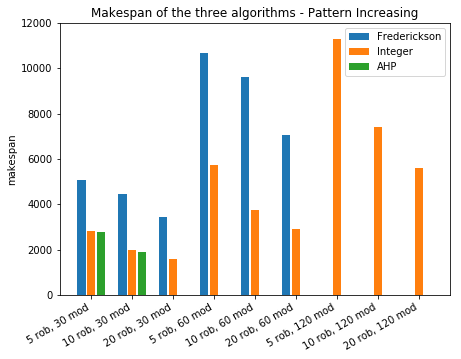

In [49]:
# Grouped bar plot
############# INCREASING #############

width = 0.5 # width of each bar
bar_dist = 0.1 # distance between bars of the same groups
group_dist = 0.8 # distance between bars of different groups
x_dist = width*3 + bar_dist*2 + group_dist

xs = np.arange(0, len(extr_increasing(smN))) * x_dist # scale the x coordinates to make space to the bars

int_xs = xs
fred_xs = xs - width - bar_dist
ahp_xs = int_xs + width + bar_dist

fig, ax = plt.subplots() # needed to rotate the labels

fred_bars = plt.bar(fred_xs, extr_increasing(fred_max_len_list), width)
int_bars= plt.bar(int_xs, extr_increasing(int_max_len_list), width)
ahp_bars = plt.bar(ahp_xs, extr_increasing(ahp_max_len_list), width)

plt.ylabel("makespan")
plt.title("Makespan of the three algorithms - Pattern Increasing")
plt.xticks(xs, extr_increasing(compute_labels(smN)))
ax.set_ylim(top=YLIM)

plt.legend((fred_bars, int_bars, ahp_bars), ("Frederickson", "Integer", "AHP"))
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

fig.set_size_inches(PLT_W, PLT_H)
fig.savefig(SAVE_FOLDER+"increasing_makespan.pdf", bbox_inches='tight', pad_inches=0.1)

In [50]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

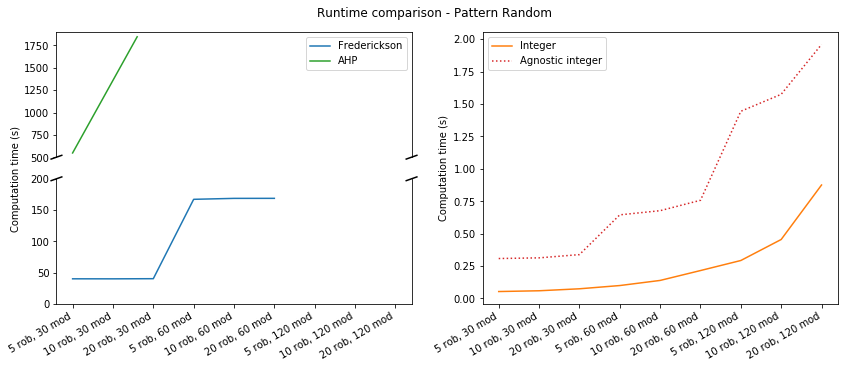

In [53]:
##### RUNTIME COMPARISON #####

fig, (ax1, ax2) = plt.subplots(1,2, sharex=True)
fig.suptitle("Runtime comparison - Pattern Random", y=0.95)

# Configure x axes
xs = np.arange(0, len(extr_random(smN)))
plt.xticks(xs, compute_labels(extr_random(smN)))
plt.setp(ax1.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax2.get_xticklabels(), rotation=30, horizontalalignment='right')

# Broken axees for plot of AHP and Fred because of scale issues 
divider = make_axes_locatable(ax1)
ax1b = divider.new_vertical(size="100%", pad=0.3)
fig.add_axes(ax1b)
ax1.spines['top'].set_visible(False)               # hide top border of bottom plot
ax1b.tick_params(bottom="off", labelbottom='off')  # hide labels and numbers on the x axis of top plot
ax1b.spines['bottom'].set_visible(False)           # hide bottom border of top plot

# From https://matplotlib.org/examples/pylab_examples/broken_axis.html
d = .015  # how big to make the diagonal lines in axes coordinates

# diagonal 'ticks' that create the 'broken axis' effect
kwargs = dict(transform=ax1b.transAxes, color='k', clip_on=False) 
ax1b.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1b.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
kwargs.update(transform=ax1.transAxes)
ax1.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# actually plotting
fred_line = ax1.plot(xs, extr_random(fred_time_list))
fred_line = ax1b.plot(xs, extr_random(fred_time_list))
ahp_line = ax1b.plot(xs, extr_random(ahp_time_list), color="tab:green")
ax1.set_ylim(0, 200)
ax1b.set_ylim(500, 1900)

ax1b.legend((fred_line[0], ahp_line[0]), ("Frederickson", "AHP"))

ax1.set_ylabel("Computation time (s)")
ax1.yaxis.set_label_coords(-0.1,1) # position the label


# Integer and Agnostic integer plot
int_line = ax2.plot(xs, extr_random(int_time_list), color="tab:orange")
agnostic_int_line = ax2.plot(xs, extr_random(agnostic_int_time_list), ":", color="tab:red")
ax2.legend(("Integer", "Agnostic integer"))

ax2.set_ylabel("Computation time (s)")

fig.set_size_inches(2*PLT_W, PLT_H)
fig.savefig(SAVE_FOLDER+"time_comparison_random.pdf", bbox_inches='tight', pad_inches=0.1)